In [2]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Liam McCann\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from adjustText import adjust_text

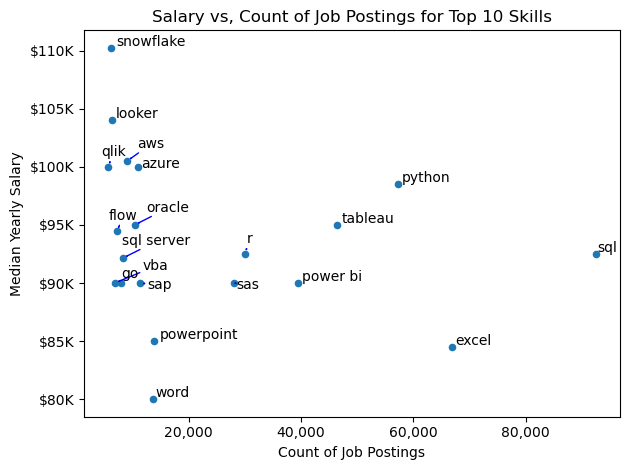

In [4]:
df = df[df["job_title_short"] == "Data Analyst"]
skill_no = 20
dfe = df.explode("job_skills")
skill_stats = dfe.groupby("job_skills").agg(
    skill_count=("job_skills", "count"), 
    median_salary=("salary_year_avg", "median") 
)
skill_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(skill_no)



skill_stats.plot(kind="scatter", x = "skill_count", y = "median_salary")

texts=[]
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats["skill_count"].iloc[i], skill_stats["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color="b", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Salary vs, Count of Job Postings for Top 10 Skills")
plt.tight_layout()
plt.show()
